# SARIMA
### Kirill Zakharov

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.optimize import minimize
%matplotlib inline
plt.style.use('ggplot')

In [6]:
data = pd.read_csv('passengers.csv', index_col='date', parse_dates=True)
data.index = pd.DatetimeIndex(data.index, freq='MS')
data.head(4)

,num_passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129


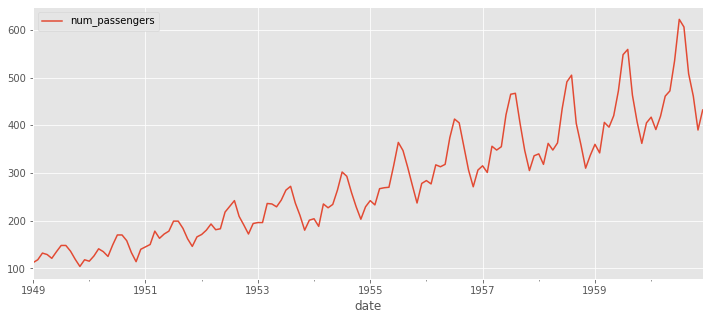

In [20]:
data.plot(figsize=(12,5))
plt.show()

In [12]:
def diff(data, s):
    return data[s:] - data[:-s]

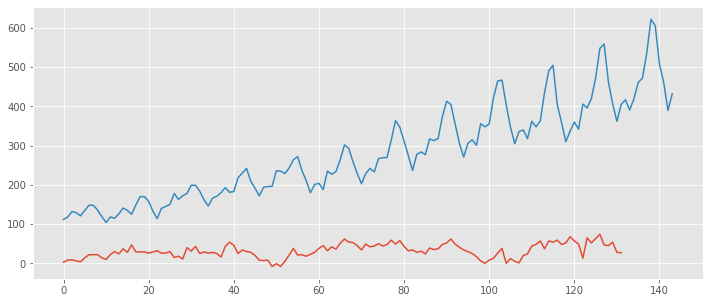

In [62]:
plt.subplots(figsize=(12,5))
plt.plot(diff(data.values, 12))
plt.plot(data.values)
plt.show()

In [176]:
# y = data.values[2:].reshape(n)
diff_s = diff(data.values, 1)
diff_s = diff(diff_s, 12)
n = len(diff_s) - 2 
ar1 = diff_s
ar2 = diff_s

In [177]:
ar1 = np.insert(ar1, 0, -1)
ar2 = np.insert(ar2, 0, -1)
ar2 = np.insert(ar2, 1, -1)

In [178]:
matrix = np.array([ar1[2:-1], ar2[2:-2], np.ones(n)])

In [179]:
def fun(x):
    return sum((diff_s[2:].flatten() - np.dot(matrix.T, x))**2)

init = np.repeat(0.5, 3)
opt1 = minimize(fun, init)
opt1

      fun: 17915.273105215478
 hess_inv: array([[ 2.86920163e-05,  1.06442007e-05, -1.43454570e-05],
       [ 1.06442007e-05,  3.28027378e-05, -5.32100158e-06],
       [-1.43454570e-05, -5.32100158e-06,  7.21015075e-06]])
      jac: array([ 0.        ,  0.00097656, -0.00024414])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 76
      nit: 7
     njev: 15
   status: 2
  success: False
        x: array([-0.31084867, -0.00141629,  0.18828706])

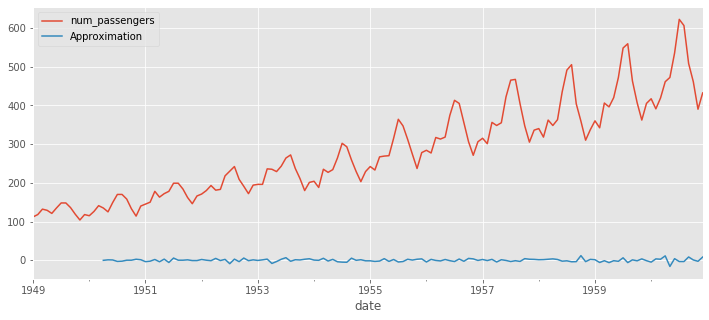

In [184]:
fig, ax = plt.subplots(figsize=(12, 5))

pred1 = np.dot(matrix.T, opt1.x)
approx1 = pd.DataFrame(pred1, index=data.index[15:], columns=['Approximation']) 

data.plot(ax=ax)
approx1.plot(ax=ax)
plt.legend()
plt.show()

In [185]:
len(pred1)

129

In [244]:
# diff_s_2 = diff(data.values, 12)
# n = len(diff_s_2) - 12 
ar1 = pred1

In [245]:
# matrix1 = np.array([ar1.flatten()[12:], np.ones(n)])
m = len(pred1)
matrix1 = np.array([ar1[12:], np.ones(m-12)])

In [246]:
len(matrix1[0])

117

In [248]:
def fun1(x):
    return sum((pred1[12:] - np.dot(matrix1.T, x))**2)

init = np.repeat(0.5, 2)
opt2 = minimize(fun1, init)
opt2

      fun: 2.111077762240523e-14
 hess_inv: array([[ 2.68541109e-04, -4.76309250e-05],
       [-4.76309250e-05,  4.28195254e-03]])
      jac: array([1.58983265e-05, 2.60859789e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 364
      nit: 4
     njev: 88
   status: 2
  success: False
        x: array([9.99999997e-01, 4.27144688e-09])

In [249]:
len(matrix1[0])

117

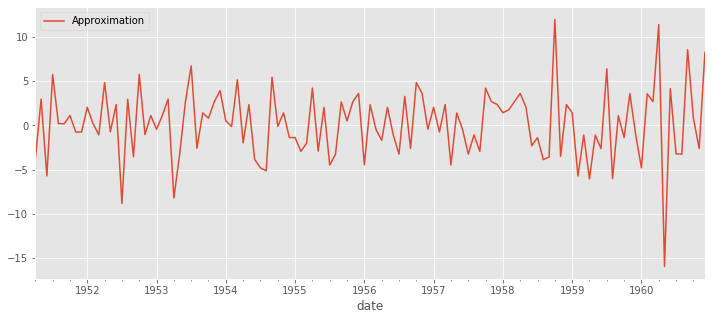

In [250]:
pred2 = np.dot(matrix1.T, opt2.x)
approx2 = pd.DataFrame(pred2, index=data.index[27:], columns=['Approximation']) 
approx2.plot(figsize=(12,5))
plt.show()

In [251]:
def back_diff(diff, data, s):
    return diff + data[:len(diff)]

In [252]:
res1 = back_diff(pred1, diff(data.values, 1).flatten(), 1)
res2 = back_diff(res1, data.values.flatten(), 12)

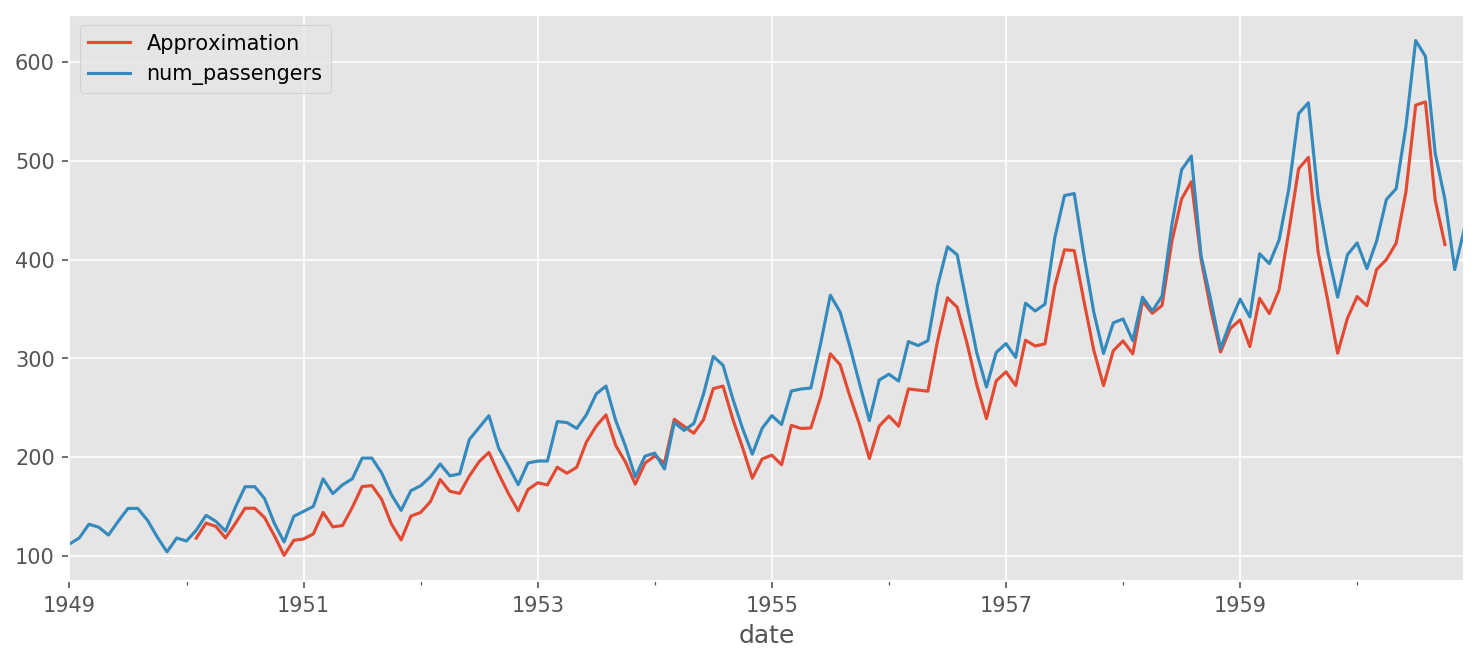

In [253]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)
approx_res = pd.DataFrame(res2, index=data.index[13:-2], columns=['Approximation']) 
approx_res.plot(ax=ax)
data.plot(ax=ax)
plt.show()